# PCA

In [1]:
import pandas as pd
import numpy as np
import pickle
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
sns.set()

In [2]:
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

### Data 

In [7]:
triplets_train = pd.read_csv('triplets_train_sample.csv')

In [9]:
songs = pd.read_csv('songs.csv')

In [197]:
term = pd.read_csv('artist_term.csv')

In [12]:
songs_sub = songs[['song_id','title','artist_name','artist_id']]

In [19]:
data = pd.merge(triplets_train,songs_sub,on='song_id',how='left')
data.head()

,user_id,song_id,play_count,title,artist_name,artist_id
0,41536eb0847ad7aa746a29d81367be6bc9f676fd,SOVGSEL12A8C141591,13,Blind,Lifehouse,ARUTEVU1187B9ACAF9
1,350e7d679291614f8678a77c17c5fa790721b7d2,SOUOHQI12A8C14224C,5,The KGB (Intro),Binary Star,ARFNJLY1187FB3E735
2,c79500b697b2397307870c83c70b4cbad1bdf508,SOUQJDY12A6701D2EF,6,True Faith,New Order,ARNHHIV1187FB4EA23
3,8fcd26be76c160e14e1555079b7bd0075ddbe5f8,SOVXTZF12A670207D2,5,The Widow,The Mars Volta,ARHUC691187B9AD27F
4,51737e957624c4dd888ae6ea6cd066754e43553f,SODNDDS12AB017F3D1,31,The Voiceless,And So I Watch You from Afar,ARCVT661187FB514A4


### PCA

In [15]:
user_id_mapping = {id:i for i, id in enumerate(data['user_id'].unique())}
song_id_mapping = {id:i for i, id in enumerate(data['song_id'].unique())}
users = len(user_id_mapping) 
songs = len(song_id_mapping) 
print(users)
print(songs)

41892
21840


In [18]:
with open('final_wmf.pkl', 'rb') as f:
    model = pickle.load(f)

In [222]:
matrix = pd.DataFrame(model.V)
matrix

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,1.204400,0.995726,1.239349,-1.115417,-0.033763,-0.973595,1.229550,-0.858981,-0.420182,-1.240288,...,1.203219,-1.061133,-1.035809,-1.265919,0.777116,1.097944,1.047922,1.263784,-0.735947,0.045780
1,1.140256,-1.261217,-0.084155,0.876425,-1.273402,1.274438,1.254497,-1.264657,1.242874,-1.252233,...,1.273133,-0.120007,1.250605,1.082442,1.246537,1.042631,-1.014144,1.274319,0.485418,1.213006
2,0.671129,-1.272041,1.263254,1.256996,1.254271,-0.889180,0.905005,0.177094,-1.258243,-0.566242,...,-0.788827,1.057514,-0.852007,-1.262227,-0.983674,0.573774,0.747380,1.244770,0.029255,0.515159
3,1.207631,-1.266270,1.261492,-0.823882,-1.010743,-0.967478,1.268733,-1.263812,-1.274963,-0.418171,...,1.245680,-1.100544,1.094184,-1.175567,1.217702,0.999011,-1.016209,1.136834,-0.205656,0.677613
4,1.117859,-0.444662,-1.268197,1.226389,-0.899788,-0.982851,0.068450,-1.255525,0.236649,-0.588108,...,1.099014,-1.266997,1.263368,-1.251114,-0.908025,-0.958618,-0.665671,-0.540725,-0.114098,1.271705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21835,0.125794,-0.470102,0.101637,0.641738,0.719679,0.507892,0.307056,-0.253161,-0.371632,0.231348,...,0.029632,-0.876151,0.581282,0.223754,0.064664,0.212602,0.233832,-0.546728,0.245711,0.259297
21836,-0.384990,-0.321370,0.339995,0.387827,-0.209360,0.656645,0.026790,0.156042,-0.102770,-0.380949,...,0.490550,-0.511149,0.363587,0.464630,0.661328,-0.629373,0.397294,-0.335817,0.560005,-0.300020
21837,-0.291975,0.344939,0.648514,-0.761859,-0.792506,-0.396911,0.745704,-0.465771,-0.405158,-0.420081,...,0.884897,-0.383546,0.201055,0.245717,0.749431,0.470876,0.352448,0.419425,-0.102042,-0.616137
21838,0.322170,-0.020427,0.160536,-0.239721,0.137067,-0.049334,-0.247298,0.487339,-0.144258,-0.177304,...,0.093554,0.108702,-0.467050,-0.421896,-0.108014,0.148252,0.223738,0.370111,-0.168562,-0.108503


In [233]:
pca = PCA(n_components = 3)
pca.fit(matrix)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [234]:
data = pca.explained_variance_ratio_

In [235]:
text = []
for i in data:
    text.append("{0:.0%}".format(i))

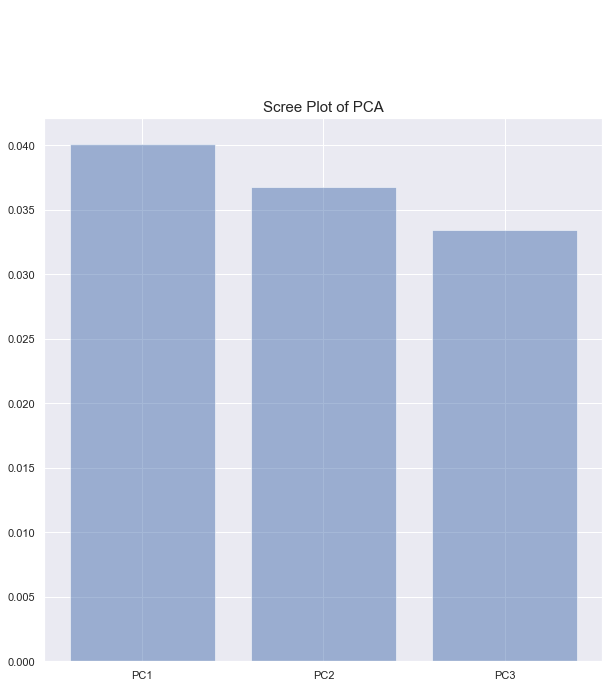

In [236]:
objects = ('PC1', 'PC2', 'PC3')
fig, ax = plt.subplots(figsize=(10,10))
y_pos = np.arange(len(objects))
ax.bar(y_pos, data, align='center', alpha=0.5)

text = []
for i in data:
    text.append("{0:.0%}".format(i))
    
for i, txt in enumerate(text):
    ax.annotate(txt, (i-0.09, data[i]+0.01),fontsize = 12)
plt.xticks(y_pos, objects)

plt.title('Scree Plot of PCA',fontsize = 15)

plt.show()

In [237]:
pca_samples = pca.transform(matrix)
ps = pd.DataFrame(pca_samples)
ps

,0,1,2
0,0.390371,1.516635,1.711524
1,-1.667619,-2.046373,0.892134
2,-0.124852,0.076079,-0.354261
3,-0.064382,-2.153632,1.825799
4,0.770090,-0.069178,1.477895
...,...,...,...
21835,0.471343,-0.214231,-0.827332
21836,0.011977,0.302203,-0.214798
21837,0.145449,0.265472,-0.077327
21838,0.011901,0.667022,-0.452862


In [55]:
def get_key(val): 
    for key, value in song_id_mapping.items(): 
         if val == value: 
                return key

In [56]:
def get_song(ind):
    lis = []
    for i in ind['PC_index']:
        lis.append(get_key(i))
    result = pd.DataFrame(lis).set_index(0).join(songs_sub.set_index('song_id')).reset_index()
    result = result.rename(columns={0: "song_id"})
    return result

In [57]:
def top10(pc_n):
    pcvalue = pd.DataFrame(ps[pc_n].nlargest(10)).reset_index()
    pcvalue = pcvalue.rename(columns={"index": "PC_index", pc_n: "PC value"})
    others = get_song(pcvalue).reset_index()
    others = others.rename(columns={0: "movie_id"})
    result = pd.concat([pcvalue,others], axis=1,sort = False).drop(columns=['index'])
    return result
def bottom10(pc_n):
    pcvalue = pd.DataFrame(ps[pc_n].nsmallest(10)).reset_index()
    pcvalue = pcvalue.rename(columns={"index": "PC_index", pc_n: "PC value"})
    others = get_song(pcvalue).reset_index()
    others = others.rename(columns={0: "movie_id"})
    result = pd.concat([pcvalue,others], axis=1,sort = False).drop(columns=['index'])
    return result

In [208]:
artist_term_group = term.groupby(['artist_id', 'term']).count().reset_index()
artist_term_group['term'] = artist_term_group.groupby(['artist_id'])[['term']].transform(lambda x: ','.join(x))
artist_term_set = artist_term_group.drop_duplicates()
artist_term_set = artist_term_set.reset_index().drop('index', axis=1)
artist_term_set

,artist_id,term
0,AR003FB1187B994355,"alternative pop rock,alternative rock,dallas,h..."
1,AR009211187B989185,"acid jazz,ballad,breakbeat,classic rock,danceh..."
2,AR009SZ1187B9A73F4,"abstract,acid jazz,acoustic,alternative rock,a..."
3,AR00A1N1187FB484EB,"80s,abstract,alternative rock,art rock,belgium..."
4,AR00AP71187B99635F,"bebop,big band,blues,blues bar,classic jazz,co..."
...,...,...
30298,ARZZRAT1187B9892CA,"90s,acid house,ambient,dance,disco,downtempo,d..."
30299,ARZZRK91187B9A5CA5,"60s,acoustic,alternative rock,art rock,black,b..."
30300,ARZZXJY1187B99E2BB,"acoustic,country,drums,flute,folk,indian,nativ..."
30301,ARZZXT51187FB4627E,"60s,alternative rock,ballad,blues,blues-rock,b..."


In [209]:
artist_term_set['term'] = artist_term_set['term'].apply(lambda x :clean(x))

In [210]:
artist_term_set

,artist_id,term
0,AR003FB1187B994355,"alternative pop rock, alternative rock, dallas..."
1,AR009211187B989185,"acid jazz, ballad, breakbeat, classic rock, da..."
2,AR009SZ1187B9A73F4,"abstract, acid jazz, acoustic, alternative roc..."
3,AR00A1N1187FB484EB,"80s, abstract, alternative rock, art rock, bel..."
4,AR00AP71187B99635F,"bebop, big band, blues, blues bar, classic jazz,"
...,...,...
30298,ARZZRAT1187B9892CA,"90s, acid house, ambient, dance, disco,"
30299,ARZZRK91187B9A5CA5,"60s, acoustic, alternative rock, art rock, bla..."
30300,ARZZXJY1187B99E2BB,"acoustic, country, drums, flute, folk,"
30301,ARZZXT51187FB4627E,"60s, alternative rock, ballad, blues, blues-ro..."


In [211]:
TOP10PC1 = pd.merge(top10(0),artist_term_set,on='artist_id',how='inner')[['title','artist_name','term']]
TOP10PC1

,title,artist_name,term
0,All These Things I Hate [revolve Around Me] [a...,Bullet For My Valentine,"aggressive, alternative metal, emo, guitar, ha..."
1,My Last Serenade,Killswitch Engage,"alternative, alternative metal, alternative ro..."
2,Let The Bridges Burn (Album Version),Killswitch Engage,"alternative, alternative metal, alternative ro..."
3,Man Of Two Minds,The Trews,"00s, 70s rock, acoustic, alternative, alternat..."
4,You Fight Me,Breaking Benjamin,"acoustic, alternative, alternative metal, alte..."
5,You Should Have Killed Me When You Had The Chance,A Day To Remember,"acoustic, alternative, alternative metal, alte..."
6,NJ Legion Iced Tea,A Day To Remember,"acoustic, alternative, alternative metal, alte..."
7,This Love_ This Hate,Hollywood Undead,"alternative, california, emo, guitar, hard rock,"
8,Nickels Is Money Too (Album Version),The Devil Wears Prada,"acoustic, brutal, christian, contemporary chri..."
9,Red Light Pledge (LP Version),Silverstein,"acoustic, emo, emotional, hardcore, heavy,"


In [212]:
BOTTOM10PC1 = pd.merge(bottom10(0),artist_term_set,on='artist_id',how='inner')[['title','artist_name','term']]
BOTTOM10PC1

,title,artist_name,term
0,O.N.E,Yeasayer,"alternative, art rock, beat, beautiful, dark,"
1,Sunrise,Yeasayer,"alternative, art rock, beat, beautiful, dark,"
2,Road To Nowhere (Remastered LP Version ),Talking Heads,"acoustic, art rock, avant-garde, classic, coll..."
3,Feel It All Around,Washed Out,"alternative, ambient, chill-out, classical, do..."
4,Fireworks,Animal Collective,"acoustic, ambient, beautiful, dark, drone,"
5,Miles Away (Album Version),Madonna,"80s pop, 90s pop, adult contemporary, alternat..."
6,These Four Walls,Miley Cyrus,"diva, female, guitar, movie, pop,"
7,Caminando Por La Calle,Gipsy Kings,"acoustic, acoustic guitar, cante jondo, contem..."
8,Lullabye,Grizzly Bear,"acoustic, brooklyn, experimental, folk, folk-p..."
9,Tu Necesitas (2008 Digital Remaster),Aleks Syntek,"90s, acoustic, america, anime, christian,"


### Visualize Top50 songs similar to the top recommendation

In [64]:
matrix_test = matrix[[0,1,2,3,4,5,6,7,8,9]]
matrix_test

,0,1,2,3,4,5,6,7,8,9
0,1.204400,0.995726,1.239349,-1.115417,-0.033763,-0.973595,1.229550,-0.858981,-0.420182,-1.240288
1,1.140256,-1.261217,-0.084155,0.876425,-1.273402,1.274438,1.254497,-1.264657,1.242874,-1.252233
2,0.671129,-1.272041,1.263254,1.256996,1.254271,-0.889180,0.905005,0.177094,-1.258243,-0.566242
3,1.207631,-1.266270,1.261492,-0.823882,-1.010743,-0.967478,1.268733,-1.263812,-1.274963,-0.418171
4,1.117859,-0.444662,-1.268197,1.226389,-0.899788,-0.982851,0.068450,-1.255525,0.236649,-0.588108
...,...,...,...,...,...,...,...,...,...,...
21835,0.125794,-0.470102,0.101637,0.641738,0.719679,0.507892,0.307056,-0.253161,-0.371632,0.231348
21836,-0.384990,-0.321370,0.339995,0.387827,-0.209360,0.656645,0.026790,0.156042,-0.102770,-0.380949
21837,-0.291975,0.344939,0.648514,-0.761859,-0.792506,-0.396911,0.745704,-0.465771,-0.405158,-0.420081
21838,0.322170,-0.020427,0.160536,-0.239721,0.137067,-0.049334,-0.247298,0.487339,-0.144258,-0.177304


In [65]:
from sklearn.metrics.pairwise import cosine_similarity

In [66]:
similarity = cosine_similarity(matrix.values)
similarity -= np.eye(similarity.shape[0])

In [67]:
# User index for recommendation
item_index = 0

# Number of similar users for recommendation
n_recommendation = 10

# Plot top n recommendations
n_plot = 10

# Sort similar users by index
similarity_item_index = np.argsort(similarity[item_index])[::-1]
# Sort similar users by score
similarity_item_score = np.sort(similarity[item_index])[::-1]

In [68]:
#50 neighbors of item 0 (index)
similarity_item_index

array([ 7451,  3283,  2975, ..., 19682,  7176,    33], dtype=int64)

In [69]:
def findkey(value,dic):
    for i in dic.keys():
        if dic[i]==value:
            return i
findkey(0,song_id_mapping)

'SOVGSEL12A8C141591'

In [70]:
song_rec = []
for index in similarity_item_index:
    song_rec.append(findkey(index,song_id_mapping))
song_rec

['SOAFEUC12A8C13F98B',
 'SOHLQOA12A8C13D8E1',
 'SOPYAQD12A8C13D8D2',
 'SOPCEOB12AF72A778A',
 'SOWWFIG12A8C13C8C2',
 'SOXLJXH12A8C13D903',
 'SOQQKOF12A6D4F74D0',
 'SOYVNUP12A8C13C8B3',
 'SOLCQUQ12A6D4F74D5',
 'SOKSLVO12AB01872CD',
 'SOHSDOP12A8C13D8F6',
 'SOUEYKW12A8C140004',
 'SOXJOGF12AF729F0CB',
 'SOKOJRH12A6D4F86B6',
 'SOOKORP12AF72A6DE2',
 'SOPCAWW12A6D4F74D2',
 'SOBXOGW12A6D4F74CE',
 'SOFHUWD12A67020931',
 'SOWHYTU12A8C13C8A4',
 'SONUVNA12A6D4F86C5',
 'SOAJVKX12A8C13D8FE',
 'SOKMURC12AF72A778C',
 'SOOHTPP12A58A7AF89',
 'SOMLNLR12AB0185DE2',
 'SOVRXWW12A6D4F74D3',
 'SOJNRAG12A8C13C89C',
 'SOIQIJB12AB01838DD',
 'SOAWXPY12A8C137E88',
 'SOBXOWJ12A6D4F85BA',
 'SOLCSBI12A67020930',
 'SOOQOMI12AF72A0548',
 'SOEHDOX12A6702093B',
 'SOPKKZW12AF72A6763',
 'SONNYLM12A8C143E5C',
 'SOPNRPF12A67020932',
 'SOKFFGS12AB0184771',
 'SOGJAOP12A6D4F74D4',
 'SONUKAE12A8C1368DC',
 'SOKXXRV12A58A77857',
 'SOKXVQZ12A8C13AD97',
 'SODAIMX12A6D4F74D6',
 'SOEITLJ12A67021321',
 'SONLGOC12A8C13C3D6',
 'SOLRJXU12

In [71]:
top50songs = ps[ps.index.isin(similarity_item_index[:50])]
top50songs

,0,1,2
377,1.849480,0.641771,3.548409
1161,0.394028,0.786178,0.610739
2054,0.286304,0.939891,1.834443
2975,-0.371931,0.796297,0.589790
3045,0.312834,2.008063,0.660207
3202,-0.116071,1.437859,0.785079
3219,-0.179982,0.625395,1.373359
3283,0.035033,1.002552,0.968256
3461,-0.165220,0.379819,0.489619
3864,2.051365,1.061441,3.247053


In [213]:
###### Prepare the data for plotting ##########
tocluster = pd.DataFrame(top50songs[[0,1,2]])

tocluster['song_index'] = tocluster.index
tocluster['song_id'] = tocluster['song_index'].apply(lambda ii: findkey(ii,song_id_mapping))

tocluster = tocluster.set_index('song_id').join(songs_sub.set_index('song_id'))

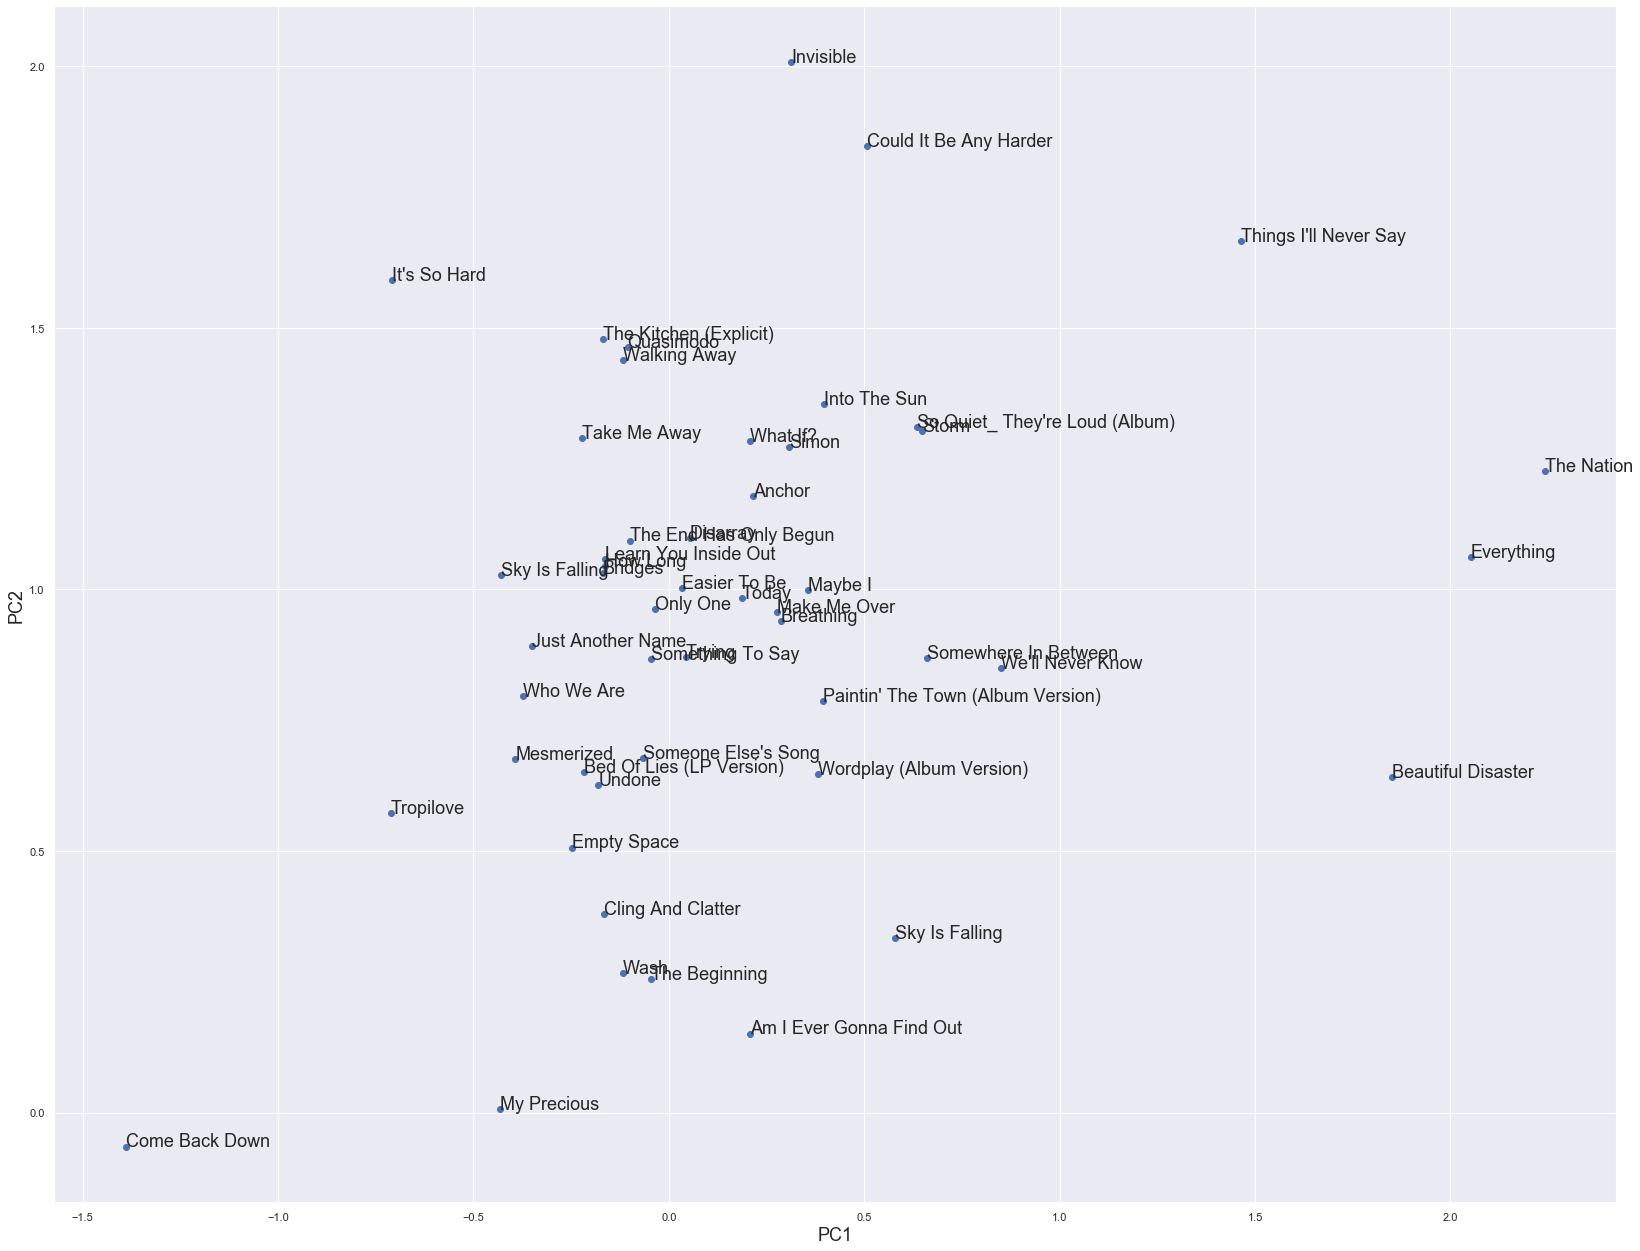

In [77]:
fig, ax = plt.subplots(figsize=(28,22))
ax.scatter(tocluster[0], tocluster[1])

ax.set_ylabel('PC2', fontsize = 18) 
ax.set_xlabel('PC1', fontsize = 18)

for i, txt in enumerate(tocluster['title']):
    ax.annotate(txt, (tocluster[0].iloc[i], tocluster[1].iloc[i]),fontsize = 18)

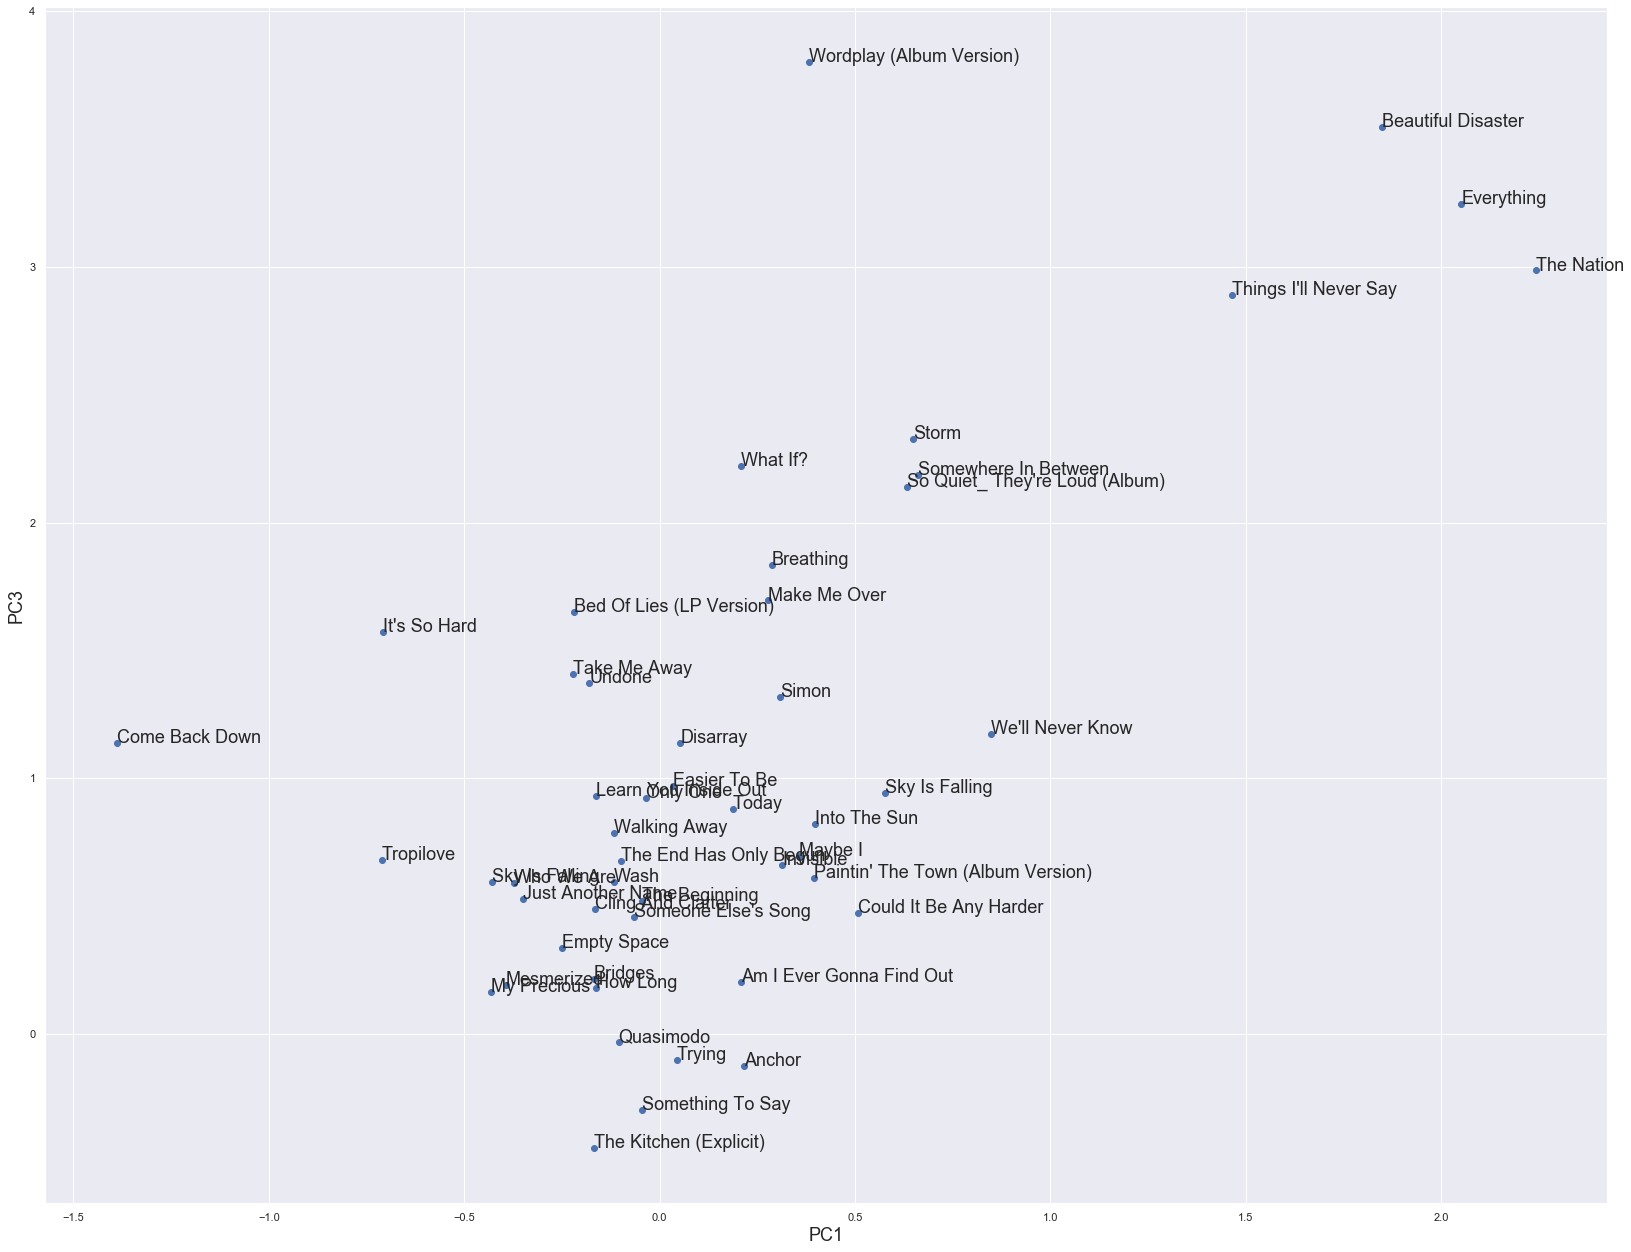

In [78]:
fig, ax = plt.subplots(figsize=(28,22))
ax.scatter(tocluster[0], tocluster[2])
#ax.set_title('v = 1',fontweight="bold", size=18) # Title
ax.set_ylabel('PC3', fontsize = 18) # Y label
ax.set_xlabel('PC1', fontsize = 18)
for i, txt in enumerate(tocluster['title']):
    ax.annotate(txt, (tocluster[0].iloc[i], tocluster[2].iloc[i]),fontsize = 18)

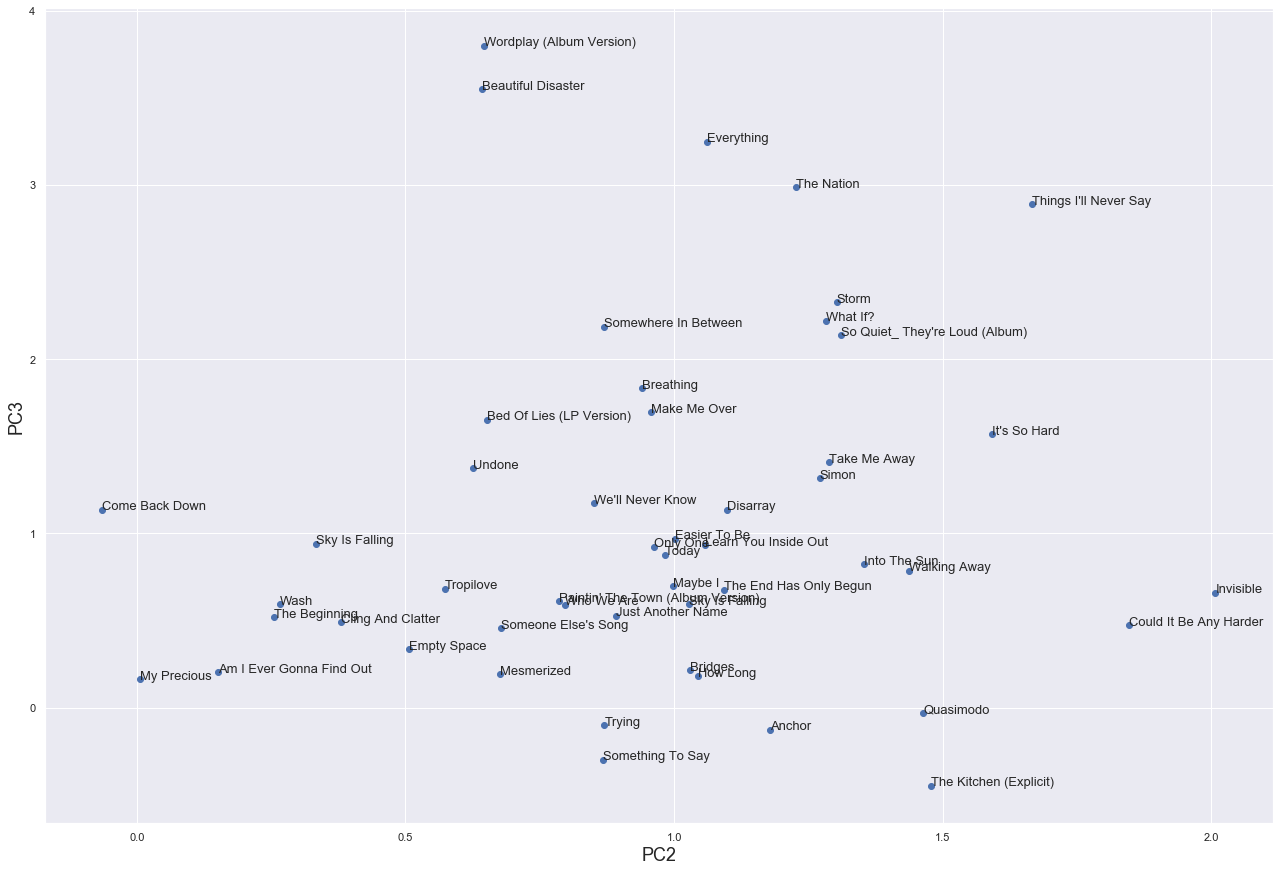

In [79]:
fig, ax = plt.subplots(figsize=(22,15))
ax.scatter(tocluster[1], tocluster[2])
#ax.set_title('v = 1',fontweight="bold", size=18) # Title
ax.set_ylabel('PC3', fontsize = 18) # Y label
ax.set_xlabel('PC2', fontsize = 18)
for i, txt in enumerate(tocluster['title']):
    ax.annotate(txt, (tocluster[1].iloc[i], tocluster[2].iloc[i]),fontsize = 13)

In [214]:
tocluster2 = pd.merge(tocluster,artist_term_set,on='artist_id',how='left')
tocluster2.head()

,0,1,2,song_index,title,artist_name,artist_id,term
0,1.849480,0.641771,3.548409,377,Beautiful Disaster,Jon McLaughlin,ARM5XIH1187B9B2508,"acoustic, comedy, country, guitar, jazz,"
1,0.394028,0.786178,0.610739,1161,Paintin' The Town (Album Version),Phil Keaggy,AR7CQVS1187B98EF75,"80s, acoustic, alternative, alternative rock, ..."
2,0.286304,0.939891,1.834443,2054,Breathing,Lifehouse,ARUTEVU1187B9ACAF9,"90s, acoustic, alternative, alternative rock, ..."
3,-0.371931,0.796297,0.589790,2975,Who We Are,Lifehouse,ARUTEVU1187B9ACAF9,"90s, acoustic, alternative, alternative rock, ..."
4,0.312834,2.008063,0.660207,3045,Invisible,Clay Aiken,ARG4KSQ1187B9A74B1,"00s, 80s, 90s, adult contemporary, america,"


In [205]:
s1 = 'acoustic,comedy,country,guitar,jazz,piano,po'
def clean(s1):
    lis = s1.split(',')[:5]
    result = ''
    for word in lis:
        result = result+word+', '
    return result

clean(s1)

'acoustic, comedy, country, guitar, jazz, '

In [215]:
tocluster2['text'] = tocluster2.apply(lambda x: str(x.iloc[4])+' - '+str(x.iloc[5])+' - '+(str(x.iloc[7])),axis=1)

In [216]:
tocluster2

,0,1,2,song_index,title,artist_name,artist_id,term,text
0,1.849480,0.641771,3.548409,377,Beautiful Disaster,Jon McLaughlin,ARM5XIH1187B9B2508,"acoustic, comedy, country, guitar, jazz,",Beautiful Disaster - Jon McLaughlin - acoustic...
1,0.394028,0.786178,0.610739,1161,Paintin' The Town (Album Version),Phil Keaggy,AR7CQVS1187B98EF75,"80s, acoustic, alternative, alternative rock, ...",Paintin' The Town (Album Version) - Phil Keagg...
2,0.286304,0.939891,1.834443,2054,Breathing,Lifehouse,ARUTEVU1187B9ACAF9,"90s, acoustic, alternative, alternative rock, ...","Breathing - Lifehouse - 90s, acoustic, alterna..."
3,-0.371931,0.796297,0.589790,2975,Who We Are,Lifehouse,ARUTEVU1187B9ACAF9,"90s, acoustic, alternative, alternative rock, ...","Who We Are - Lifehouse - 90s, acoustic, altern..."
4,0.312834,2.008063,0.660207,3045,Invisible,Clay Aiken,ARG4KSQ1187B9A74B1,"00s, 80s, 90s, adult contemporary, america,","Invisible - Clay Aiken - 00s, 80s, 90s, adult ..."
5,-0.116071,1.437859,0.785079,3202,Walking Away,Lifehouse,ARUTEVU1187B9ACAF9,"90s, acoustic, alternative, alternative rock, ...","Walking Away - Lifehouse - 90s, acoustic, alte..."
6,-0.179982,0.625395,1.373359,3219,Undone,Lifehouse,ARUTEVU1187B9ACAF9,"90s, acoustic, alternative, alternative rock, ...","Undone - Lifehouse - 90s, acoustic, alternativ..."
7,0.035033,1.002552,0.968256,3283,Easier To Be,Lifehouse,ARUTEVU1187B9ACAF9,"90s, acoustic, alternative, alternative rock, ...","Easier To Be - Lifehouse - 90s, acoustic, alte..."
8,-0.165220,0.379819,0.489619,3461,Cling And Clatter,Lifehouse,ARUTEVU1187B9ACAF9,"90s, acoustic, alternative, alternative rock, ...","Cling And Clatter - Lifehouse - 90s, acoustic,..."
9,2.051365,1.061441,3.247053,3864,Everything,Lifehouse,ARUTEVU1187B9ACAF9,"90s, acoustic, alternative, alternative rock, ...","Everything - Lifehouse - 90s, acoustic, altern..."


In [217]:
fig = go.Figure(data=go.Scatter(x=tocluster2[0],
                                y=tocluster2[1],
                                mode='markers',
                                text=tocluster2['text'])) # hover text goes here

In [218]:
fig.update_layout(title='PC1 and PC2')
fig.show()

In [219]:
fig2 = go.Figure(data=go.Scatter(x=tocluster2[1],
                                y=tocluster2[2],
                                mode='markers',
                                text=tocluster2['text'])) # hover text goes here

fig2.update_layout(title='PC2 and PC3')
fig2.show()

In [220]:
import plotly.express as px

fig = px.scatter_3d(tocluster2, x=0,y=1,z=2,text=tocluster2['title'],hover_name=tocluster2['text'])

fig.show()